In [1]:
import pandas as pd
import requests 
from bs4 import BeautifulSoup
import numpy as np

import re
import time

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
url = "https://www.cars.com/shopping/results/?deal_ratings[]=great&deal_ratings[]=good&deal_ratings[]=fair&dealer_id=&keyword=&list_price_max=&list_price_min=&makes[]=&maximum_distance=20&mileage_max=&page_size=20&sort=best_match_desc&stock_type=used&year_max=&year_min=&zip="

In [3]:
url

'https://www.cars.com/shopping/results/?deal_ratings[]=great&deal_ratings[]=good&deal_ratings[]=fair&dealer_id=&keyword=&list_price_max=&list_price_min=&makes[]=&maximum_distance=20&mileage_max=&page_size=20&sort=best_match_desc&stock_type=used&year_max=&year_min=&zip='

In [4]:
r = requests.get(url)

In [5]:
r.status_code

200

In [6]:
soup = BeautifulSoup(r.content)

In [7]:
soup

<!DOCTYPE html>
<html class="ep-theme-cars" lang="en">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<title data-suffix=" | Cars.com">Used Vehicles for Sale | Cars.com</title>
<meta content="Shop used vehicles for sale at Cars.com. Research, compare, and save listings, or contact sellers directly from 10,000+ vehicles nationwide." name="description"/>
<meta content="noindex, nofollow" name="robots"/>
<meta content="Cars.com" property="og:site_name"/>
<meta content="website" property="og:type"/>
<meta content="Used Vehicles for Sale | Cars.com" property="og:title"/>
<meta content="https://www.cars.com/shopping/results" property="og:url"/>
<meta content="Shop used vehicles for sale at Cars.com. Research, compare, and save listings, or contact sellers directly from 10,000+ vehicles nationwide." property="og:description"/>
<meta content="https://graphics.cars.com/images/core/logo

In [8]:
result = soup.find_all('div',{"class" : "vehicle-card"})

In [9]:
len(result)

21

In [10]:
#Name
#Mileage
#Price
#Badge_lable
#Dealer_name
#Rating
#No_Of_Reviews

In [11]:
Name = []
Mileage = []
Price = [] 
Badge_Lable =[]
Dealer_name = []
Rating = []
Review_count = []
pagenum = []

for i in range(1,27): 
    start_time = time.time()
    URL = ''.format(i)
    page = requests.get(url)
    pagecontent = page.text
    soup = BeautifulSoup(pagecontent)

    for x in soup.find_all('div',{"class" : "vehicle-card"}):
        mileage = x.find('div',{"class":"mileage"})
        cname = x.find('h2')
        cost = x.find('span',{"class":"primary-price"})
        badge = x.find('span', {"class": "sds-badge__label"})
        dealer = x.find('div', {"class": "dealer-name"})
        rat   = x.find('span', {"class":"sds-rating__count"})
        riv = x.find('span', {'class':'sds-rating__link'})
        
        if mileage is None:
            Mileage.append(np.NaN)
        else:
            Mileage.append(mileage.text)
            
        if cname is None:
            Title.append(np.NaN)
        else:
            Name.append(cname.text)
            
        if cost is None:
            Price.append(np.NaN)
        else:
            Price.append(cost.text)
            
        if badge is None:
            Badge_Lable.append(np.NaN)
        else:
            Badge_Lable.append(badge.text)
            
        if rat is None:
            Rating.append(np.NaN)
        else:
            Rating.append(rat.text)
            
        if dealer is None:
            Dealer_name.append(np.NaN)
        else:
            Dealer_name.append(dealer.text)
            
        if riv is None:
            Review_count.append(np.NaN)
        else:
            Review_count.append(riv.text) 

            
        pagenum.append(i)
    print('Page {} completed in {} seconds'.format(i, time.time()-start_time))

Page 1 completed in 2.002422332763672 seconds
Page 2 completed in 1.775055170059204 seconds
Page 3 completed in 1.9256291389465332 seconds
Page 4 completed in 1.7891514301300049 seconds
Page 5 completed in 2.0159590244293213 seconds
Page 6 completed in 1.7168118953704834 seconds
Page 7 completed in 2.117251396179199 seconds
Page 8 completed in 1.7232625484466553 seconds
Page 9 completed in 1.7290637493133545 seconds
Page 10 completed in 2.1455047130584717 seconds
Page 11 completed in 1.8710923194885254 seconds
Page 12 completed in 1.9712934494018555 seconds
Page 13 completed in 1.8983807563781738 seconds
Page 14 completed in 1.8924391269683838 seconds
Page 15 completed in 1.8528375625610352 seconds
Page 16 completed in 1.9704570770263672 seconds
Page 17 completed in 1.8770473003387451 seconds
Page 18 completed in 2.016839027404785 seconds
Page 19 completed in 1.8403093814849854 seconds
Page 20 completed in 1.8006436824798584 seconds
Page 21 completed in 1.991960048675537 seconds
Page 2

In [12]:
len(Name) 
len(Mileage) 
len(Price) 
len(Badge_Lable)
len(Dealer_name) 
len(Rating) 
len(Review_count) 
len(pagenum) 

546

546

546

546

546

546

546

546

In [39]:
CarDetails_df = pd.DataFrame({'CarName':Name, 'CarMileage':Mileage, 'CarPrice':Price, 'CarBadge': Badge_Lable, 'CarDealer':Dealer_name, 'CarRating': Rating, 'CarReviewCount': Review_count, 'PageNumb': pagenum})

In [40]:
CarDetails_df

,CarName,CarMileage,CarPrice,CarBadge,CarDealer,CarRating,CarReviewCount,PageNumb
0,2019 Honda CR-V EX-L,"34,591 mi.","$29,855",Good Deal,\nRapids Honda\n,4.6,"(2,741 reviews)",1
1,2002 Ford F-350 XLT,"122,742 mi.","$21,688","Good Deal | $1,002 under",\nAutowise\n,4.5,(78 reviews),1
2,2022 Mercedes-Benz AMG GLC 43 AMG GLC 43,"4,603 mi.","$74,995",Good Deal,\nMercedes-Benz of Lynnwood\n,4.5,(125 reviews),1
3,2014 Chevrolet SS Base,"75,264 mi.","$36,950",Good Deal,\nLKL Motors\n,4.7,(30 reviews),1
4,2020 Jaguar XE R-Dynamic S,"10,951 mi.","$44,998",Good Deal,\nCarMax Renton - Now offering Curbside Pickup\n,4.0,(4 reviews),1
...,...,...,...,...,...,...,...,...
541,2010 BMW X3 xDrive30i,"89,728 mi.","$12,440",Fair Deal,\nKuni BMW\n,4.7,"(1,397 reviews)",26
542,2017 Nissan NV200 SV,"7,331 mi.","$32,998",Fair Deal,\nCarMax Beaverton - Now offering Curbside Pic...,3.6,(8 reviews),26
543,2015 Maserati GranTurismo Sport,"28,838 mi.","$56,000","Good Deal | $1,970 under",\nFerrari Maserati of Central Florida\n,4.1,(33 reviews),26
544,2014 Ford Expedition EL XLT,"115,671 mi.","$14,950","Great Deal | $2,878 under",\nShift Seattle - Online\n,NaN,(0 reviews),26


In [41]:
CarDetails_df.to_csv('Car.csv')

In [42]:
import joblib

In [43]:
joblib.dump(CarDetails_df,"C:\\Users\\91970\\Data Science - 167 batch\\Cars.pkl")

['C:\\Users\\91970\\Data Science - 167 batch\\Cars.pkl']

In [44]:
abc = joblib.load("C:\\Users\\91970\\Data Science - 167 batch\\Cars.pkl")

In [45]:
abc.head()

,CarName,CarMileage,CarPrice,CarBadge,CarDealer,CarRating,CarReviewCount,PageNumb
0,2019 Honda CR-V EX-L,"34,591 mi.","$29,855",Good Deal,\nRapids Honda\n,4.6,"(2,741 reviews)",1
1,2002 Ford F-350 XLT,"122,742 mi.","$21,688","Good Deal | $1,002 under",\nAutowise\n,4.5,(78 reviews),1
2,2022 Mercedes-Benz AMG GLC 43 AMG GLC 43,"4,603 mi.","$74,995",Good Deal,\nMercedes-Benz of Lynnwood\n,4.5,(125 reviews),1
3,2014 Chevrolet SS Base,"75,264 mi.","$36,950",Good Deal,\nLKL Motors\n,4.7,(30 reviews),1
4,2020 Jaguar XE R-Dynamic S,"10,951 mi.","$44,998",Good Deal,\nCarMax Renton - Now offering Curbside Pickup\n,4.0,(4 reviews),1


In [46]:
CarDetails_df = abc.copy()

In [47]:
CarDetails_df.head()

,CarName,CarMileage,CarPrice,CarBadge,CarDealer,CarRating,CarReviewCount,PageNumb
0,2019 Honda CR-V EX-L,"34,591 mi.","$29,855",Good Deal,\nRapids Honda\n,4.6,"(2,741 reviews)",1
1,2002 Ford F-350 XLT,"122,742 mi.","$21,688","Good Deal | $1,002 under",\nAutowise\n,4.5,(78 reviews),1
2,2022 Mercedes-Benz AMG GLC 43 AMG GLC 43,"4,603 mi.","$74,995",Good Deal,\nMercedes-Benz of Lynnwood\n,4.5,(125 reviews),1
3,2014 Chevrolet SS Base,"75,264 mi.","$36,950",Good Deal,\nLKL Motors\n,4.7,(30 reviews),1
4,2020 Jaguar XE R-Dynamic S,"10,951 mi.","$44,998",Good Deal,\nCarMax Renton - Now offering Curbside Pickup\n,4.0,(4 reviews),1


In [48]:
CarDetails_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CarName         546 non-null    object
 1   CarMileage      536 non-null    object
 2   CarPrice        546 non-null    object
 3   CarBadge        546 non-null    object
 4   CarDealer       546 non-null    object
 5   CarRating       502 non-null    object
 6   CarReviewCount  533 non-null    object
 7   PageNumb        546 non-null    int64 
dtypes: int64(1), object(7)
memory usage: 34.2+ KB


## Extracting and cleaning the data

In [49]:
CarDetails_df['CarName'][0]

'2019 Honda CR-V EX-L'

In [50]:
CarDetails_df.head()

,CarName,CarMileage,CarPrice,CarBadge,CarDealer,CarRating,CarReviewCount,PageNumb
0,2019 Honda CR-V EX-L,"34,591 mi.","$29,855",Good Deal,\nRapids Honda\n,4.6,"(2,741 reviews)",1
1,2002 Ford F-350 XLT,"122,742 mi.","$21,688","Good Deal | $1,002 under",\nAutowise\n,4.5,(78 reviews),1
2,2022 Mercedes-Benz AMG GLC 43 AMG GLC 43,"4,603 mi.","$74,995",Good Deal,\nMercedes-Benz of Lynnwood\n,4.5,(125 reviews),1
3,2014 Chevrolet SS Base,"75,264 mi.","$36,950",Good Deal,\nLKL Motors\n,4.7,(30 reviews),1
4,2020 Jaguar XE R-Dynamic S,"10,951 mi.","$44,998",Good Deal,\nCarMax Renton - Now offering Curbside Pickup\n,4.0,(4 reviews),1


In [51]:
re.findall('[0-9]{4}', CarDetails_df['CarName'][0])

['2019']

In [52]:
" ".join(re.findall('[0-9]{4}', CarDetails_df['CarName'][0]))

'2019'

In [53]:
CarDetails_df['Year']= CarDetails_df['CarName'].str.split(' ').str[0]

In [54]:
CarDetails_df.head()

,CarName,CarMileage,CarPrice,CarBadge,CarDealer,CarRating,CarReviewCount,PageNumb,Year
0,2019 Honda CR-V EX-L,"34,591 mi.","$29,855",Good Deal,\nRapids Honda\n,4.6,"(2,741 reviews)",1,2019
1,2002 Ford F-350 XLT,"122,742 mi.","$21,688","Good Deal | $1,002 under",\nAutowise\n,4.5,(78 reviews),1,2002
2,2022 Mercedes-Benz AMG GLC 43 AMG GLC 43,"4,603 mi.","$74,995",Good Deal,\nMercedes-Benz of Lynnwood\n,4.5,(125 reviews),1,2022
3,2014 Chevrolet SS Base,"75,264 mi.","$36,950",Good Deal,\nLKL Motors\n,4.7,(30 reviews),1,2014
4,2020 Jaguar XE R-Dynamic S,"10,951 mi.","$44,998",Good Deal,\nCarMax Renton - Now offering Curbside Pickup\n,4.0,(4 reviews),1,2020


In [55]:
CarDetails_df['CarDealer'] = CarDetails_df['CarDealer'].str.strip()

In [56]:
CarDetails_df.head()

,CarName,CarMileage,CarPrice,CarBadge,CarDealer,CarRating,CarReviewCount,PageNumb,Year
0,2019 Honda CR-V EX-L,"34,591 mi.","$29,855",Good Deal,Rapids Honda,4.6,"(2,741 reviews)",1,2019
1,2002 Ford F-350 XLT,"122,742 mi.","$21,688","Good Deal | $1,002 under",Autowise,4.5,(78 reviews),1,2002
2,2022 Mercedes-Benz AMG GLC 43 AMG GLC 43,"4,603 mi.","$74,995",Good Deal,Mercedes-Benz of Lynnwood,4.5,(125 reviews),1,2022
3,2014 Chevrolet SS Base,"75,264 mi.","$36,950",Good Deal,LKL Motors,4.7,(30 reviews),1,2014
4,2020 Jaguar XE R-Dynamic S,"10,951 mi.","$44,998",Good Deal,CarMax Renton - Now offering Curbside Pickup,4.0,(4 reviews),1,2020


In [57]:
det = CarDetails_df['CarBadge'].apply(lambda x: re.sub('[|$,0-9]','',x))

In [58]:
det

0               Good Deal
1       Good Deal   under
2               Good Deal
3               Good Deal
4               Good Deal
              ...        
541             Fair Deal
542             Fair Deal
543     Good Deal   under
544    Great Deal   under
545             Fair Deal
Name: CarBadge, Length: 546, dtype: object

In [59]:
CarDetails_df['CarBadge'] = CarDetails_df['CarBadge'].apply(lambda x: re.sub('[|$,0-9]','',x))

In [60]:
CarDetails_df.head()

,CarName,CarMileage,CarPrice,CarBadge,CarDealer,CarRating,CarReviewCount,PageNumb,Year
0,2019 Honda CR-V EX-L,"34,591 mi.","$29,855",Good Deal,Rapids Honda,4.6,"(2,741 reviews)",1,2019
1,2002 Ford F-350 XLT,"122,742 mi.","$21,688",Good Deal under,Autowise,4.5,(78 reviews),1,2002
2,2022 Mercedes-Benz AMG GLC 43 AMG GLC 43,"4,603 mi.","$74,995",Good Deal,Mercedes-Benz of Lynnwood,4.5,(125 reviews),1,2022
3,2014 Chevrolet SS Base,"75,264 mi.","$36,950",Good Deal,LKL Motors,4.7,(30 reviews),1,2014
4,2020 Jaguar XE R-Dynamic S,"10,951 mi.","$44,998",Good Deal,CarMax Renton - Now offering Curbside Pickup,4.0,(4 reviews),1,2020


In [61]:
para = CarDetails_df['CarReviewCount'].apply(lambda x: re.sub('[\(\)]','',x))

TypeError: expected string or bytes-like object

In [62]:
para

NameError: name 'para' is not defined

In [63]:
para2 = CarDetails_df['CarReviewCount'].apply(lambda x: re.sub('[\(\),reviews]','',x))

TypeError: expected string or bytes-like object

In [64]:
para2

NameError: name 'para2' is not defined

In [65]:
CarDetails_df['CarReviewCount'] = CarDetails_df['CarReviewCount'].apply(lambda x: re.sub('[\(\),reviews]','',x))

TypeError: expected string or bytes-like object

In [66]:
CarDetails_df.head()

,CarName,CarMileage,CarPrice,CarBadge,CarDealer,CarRating,CarReviewCount,PageNumb,Year
0,2019 Honda CR-V EX-L,"34,591 mi.","$29,855",Good Deal,Rapids Honda,4.6,"(2,741 reviews)",1,2019
1,2002 Ford F-350 XLT,"122,742 mi.","$21,688",Good Deal under,Autowise,4.5,(78 reviews),1,2002
2,2022 Mercedes-Benz AMG GLC 43 AMG GLC 43,"4,603 mi.","$74,995",Good Deal,Mercedes-Benz of Lynnwood,4.5,(125 reviews),1,2022
3,2014 Chevrolet SS Base,"75,264 mi.","$36,950",Good Deal,LKL Motors,4.7,(30 reviews),1,2014
4,2020 Jaguar XE R-Dynamic S,"10,951 mi.","$44,998",Good Deal,CarMax Renton - Now offering Curbside Pickup,4.0,(4 reviews),1,2020


In [67]:
pri = CarDetails_df['CarPrice'].apply(lambda x: re.sub('[$,]','',x))

In [68]:
pri

0      29855
1      21688
2      74995
3      36950
4      44998
       ...  
541    12440
542    32998
543    56000
544    14950
545    69991
Name: CarPrice, Length: 546, dtype: object

In [69]:
CarDetails_df['CarPrice'] = CarDetails_df['CarPrice'].apply(lambda x: re.sub('[$,]','',x))

In [70]:
CarDetails_df.head()

,CarName,CarMileage,CarPrice,CarBadge,CarDealer,CarRating,CarReviewCount,PageNumb,Year
0,2019 Honda CR-V EX-L,"34,591 mi.",29855,Good Deal,Rapids Honda,4.6,"(2,741 reviews)",1,2019
1,2002 Ford F-350 XLT,"122,742 mi.",21688,Good Deal under,Autowise,4.5,(78 reviews),1,2002
2,2022 Mercedes-Benz AMG GLC 43 AMG GLC 43,"4,603 mi.",74995,Good Deal,Mercedes-Benz of Lynnwood,4.5,(125 reviews),1,2022
3,2014 Chevrolet SS Base,"75,264 mi.",36950,Good Deal,LKL Motors,4.7,(30 reviews),1,2014
4,2020 Jaguar XE R-Dynamic S,"10,951 mi.",44998,Good Deal,CarMax Renton - Now offering Curbside Pickup,4.0,(4 reviews),1,2020


In [71]:
CarDetails_df['CarMileage'] = CarDetails_df['CarMileage'].apply(lambda x: re.sub('[,mi.]','',x))
CarDetails_df.head()

TypeError: expected string or bytes-like object

In [72]:
CarDetails_df['CarName']= CarDetails_df['CarName'].apply(lambda x: re.sub('[0-9]+','',x))
CarDetails_df

,CarName,CarMileage,CarPrice,CarBadge,CarDealer,CarRating,CarReviewCount,PageNumb,Year
0,Honda CR-V EX-L,"34,591 mi.",29855,Good Deal,Rapids Honda,4.6,"(2,741 reviews)",1,2019
1,Ford F- XLT,"122,742 mi.",21688,Good Deal under,Autowise,4.5,(78 reviews),1,2002
2,Mercedes-Benz AMG GLC AMG GLC,"4,603 mi.",74995,Good Deal,Mercedes-Benz of Lynnwood,4.5,(125 reviews),1,2022
3,Chevrolet SS Base,"75,264 mi.",36950,Good Deal,LKL Motors,4.7,(30 reviews),1,2014
4,Jaguar XE R-Dynamic S,"10,951 mi.",44998,Good Deal,CarMax Renton - Now offering Curbside Pickup,4.0,(4 reviews),1,2020
...,...,...,...,...,...,...,...,...,...
541,BMW X xDrivei,"89,728 mi.",12440,Fair Deal,Kuni BMW,4.7,"(1,397 reviews)",26,2010
542,Nissan NV SV,"7,331 mi.",32998,Fair Deal,CarMax Beaverton - Now offering Curbside Pickup,3.6,(8 reviews),26,2017
543,Maserati GranTurismo Sport,"28,838 mi.",56000,Good Deal under,Ferrari Maserati of Central Florida,4.1,(33 reviews),26,2015
544,Ford Expedition EL XLT,"115,671 mi.",14950,Great Deal under,Shift Seattle - Online,NaN,(0 reviews),26,2014


In [73]:
name

NameError: name 'name' is not defined

In [74]:
name[0][1:5]

NameError: name 'name' is not defined

In [75]:
CarDetails_df['CarName'] = CarDetails_df['CarName'].str.split(' ').str[1]
CarDetails_df.head()

,CarName,CarMileage,CarPrice,CarBadge,CarDealer,CarRating,CarReviewCount,PageNumb,Year
0,Honda,"34,591 mi.",29855,Good Deal,Rapids Honda,4.6,"(2,741 reviews)",1,2019
1,Ford,"122,742 mi.",21688,Good Deal under,Autowise,4.5,(78 reviews),1,2002
2,Mercedes-Benz,"4,603 mi.",74995,Good Deal,Mercedes-Benz of Lynnwood,4.5,(125 reviews),1,2022
3,Chevrolet,"75,264 mi.",36950,Good Deal,LKL Motors,4.7,(30 reviews),1,2014
4,Jaguar,"10,951 mi.",44998,Good Deal,CarMax Renton - Now offering Curbside Pickup,4.0,(4 reviews),1,2020


In [76]:
CarDetails_df['CarBadge']= CarDetails_df['CarBadge'].str.split(' ').str[0]
CarDetails_df.head()

,CarName,CarMileage,CarPrice,CarBadge,CarDealer,CarRating,CarReviewCount,PageNumb,Year
0,Honda,"34,591 mi.",29855,Good,Rapids Honda,4.6,"(2,741 reviews)",1,2019
1,Ford,"122,742 mi.",21688,Good,Autowise,4.5,(78 reviews),1,2002
2,Mercedes-Benz,"4,603 mi.",74995,Good,Mercedes-Benz of Lynnwood,4.5,(125 reviews),1,2022
3,Chevrolet,"75,264 mi.",36950,Good,LKL Motors,4.7,(30 reviews),1,2014
4,Jaguar,"10,951 mi.",44998,Good,CarMax Renton - Now offering Curbside Pickup,4.0,(4 reviews),1,2020


In [77]:
CarDetails_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CarName         546 non-null    object
 1   CarMileage      536 non-null    object
 2   CarPrice        546 non-null    object
 3   CarBadge        546 non-null    object
 4   CarDealer       546 non-null    object
 5   CarRating       502 non-null    object
 6   CarReviewCount  533 non-null    object
 7   PageNumb        546 non-null    int64 
 8   Year            546 non-null    object
dtypes: int64(1), object(8)
memory usage: 38.5+ KB


In [78]:
CarDetails_df['CarMileage'] = CarDetails_df['CarMileage'].astype(int)

ValueError: invalid literal for int() with base 10: '34,591 mi.'

In [79]:
CarDetails_df['CarPrice'] = CarDetails_df['CarPrice'].astype(int)

In [80]:
CarDetails_df['CarRating'] = CarDetails_df['CarRating'].astype(float)

In [81]:
CarDetails_df['CarReviewCount'] = CarDetails_df['CarReviewCount'].astype(int)

ValueError: invalid literal for int() with base 10: '(2,741 reviews)'

In [82]:
CarDetails_df['Year'] = CarDetails_df['Year'].astype(int)

In [83]:
CarDetails_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CarName         546 non-null    object 
 1   CarMileage      536 non-null    object 
 2   CarPrice        546 non-null    int32  
 3   CarBadge        546 non-null    object 
 4   CarDealer       546 non-null    object 
 5   CarRating       502 non-null    float64
 6   CarReviewCount  533 non-null    object 
 7   PageNumb        546 non-null    int64  
 8   Year            546 non-null    int32  
dtypes: float64(1), int32(2), int64(1), object(5)
memory usage: 34.2+ KB


In [84]:
CarDetails_df.describe()

,CarPrice,CarRating,PageNumb,Year
count,546.000000,502.000000,546.000000,546.000000
mean,48426.261905,4.522908,13.500000,2016.789377
std,30425.998304,0.322127,7.506878,4.884121
min,10499.000000,3.400000,1.000000,2002.000000
25%,29855.000000,4.400000,7.000000,2015.000000
50%,39995.000000,4.600000,13.500000,2018.000000
75%,67950.000000,4.700000,20.000000,2020.000000
max,151895.000000,5.000000,26.000000,2022.000000


In [85]:
CarDetails_df = CarDetails_df.drop(columns="PageNumb")

In [86]:
CarDetails_df.describe()

,CarPrice,CarRating,Year
count,546.000000,502.000000,546.000000
mean,48426.261905,4.522908,2016.789377
std,30425.998304,0.322127,4.884121
min,10499.000000,3.400000,2002.000000
25%,29855.000000,4.400000,2015.000000
50%,39995.000000,4.600000,2018.000000
75%,67950.000000,4.700000,2020.000000
max,151895.000000,5.000000,2022.000000


In [87]:
CarDetails_df['CarAge'] = 2022 - CarDetails_df['Year']

In [88]:
ra = CarDetails_df['CarRating'].fillna(0)

In [89]:
ra

0      4.6
1      4.5
2      4.5
3      4.7
4      4.0
      ... 
541    4.7
542    3.6
543    4.1
544    0.0
545    0.0
Name: CarRating, Length: 546, dtype: float64

In [90]:
CarDetails_df['CarRating'] = CarDetails_df['CarRating'].fillna(0)

In [91]:
CarDetails_df

,CarName,CarMileage,CarPrice,CarBadge,CarDealer,CarRating,CarReviewCount,Year,CarAge
0,Honda,"34,591 mi.",29855,Good,Rapids Honda,4.6,"(2,741 reviews)",2019,3
1,Ford,"122,742 mi.",21688,Good,Autowise,4.5,(78 reviews),2002,20
2,Mercedes-Benz,"4,603 mi.",74995,Good,Mercedes-Benz of Lynnwood,4.5,(125 reviews),2022,0
3,Chevrolet,"75,264 mi.",36950,Good,LKL Motors,4.7,(30 reviews),2014,8
4,Jaguar,"10,951 mi.",44998,Good,CarMax Renton - Now offering Curbside Pickup,4.0,(4 reviews),2020,2
...,...,...,...,...,...,...,...,...,...
541,BMW,"89,728 mi.",12440,Fair,Kuni BMW,4.7,"(1,397 reviews)",2010,12
542,Nissan,"7,331 mi.",32998,Fair,CarMax Beaverton - Now offering Curbside Pickup,3.6,(8 reviews),2017,5
543,Maserati,"28,838 mi.",56000,Good,Ferrari Maserati of Central Florida,4.1,(33 reviews),2015,7
544,Ford,"115,671 mi.",14950,Great,Shift Seattle - Online,0.0,(0 reviews),2014,8


# Data Analysis

In [92]:
# Univariate

In [93]:
CarDetails_df["CarName"].value_counts()

Ford             68
Jaguar           42
Lincoln          39
Mercedes-Benz    37
Lexus            33
Maserati         33
Mazda            30
Audi             30
Chevrolet        26
Ferrari          26
Volvo            26
Toyota           26
Porsche          26
Land             26
Honda            21
BMW              20
Genesis          16
Nissan           15
Hyundai           6
Name: CarName, dtype: int64

<Figure size 720x360 with 0 Axes>

<AxesSubplot:xlabel='CarName', ylabel='count'>

Text(0.5, 1.0, 'Number of Cars Per Brand')

Text(0, 0.5, 'Number of Cars')

Text(0.5, 0, 'Car Brands')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'Honda'),
  Text(1, 0, 'Ford'),
  Text(2, 0, 'Mercedes-Benz'),
  Text(3, 0, 'Chevrolet'),
  Text(4, 0, 'Jaguar'),
  Text(5, 0, 'Ferrari'),
  Text(6, 0, 'Mazda'),
  Text(7, 0, 'Volvo'),
  Text(8, 0, 'Toyota'),
  Text(9, 0, 'Lincoln'),
  Text(10, 0, 'Maserati'),
  Text(11, 0, 'Porsche'),
  Text(12, 0, 'Genesis'),
  Text(13, 0, 'BMW'),
  Text(14, 0, 'Lexus'),
  Text(15, 0, 'Land'),
  Text(16, 0, 'Nissan'),
  Text(17, 0, 'Audi'),
  Text(18, 0, 'Hyundai')])

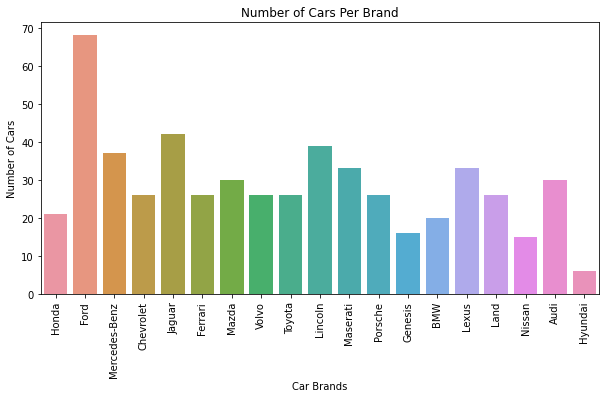

In [94]:
plt.figure(figsize=(10,5))
sns.countplot(x='CarName', data=CarDetails_df)
plt.title('Number of Cars Per Brand')
plt.ylabel('Number of Cars')
plt.xlabel('Car Brands')
plt.xticks(rotation = 90)
plt.show()

<AxesSubplot:ylabel='Year'>

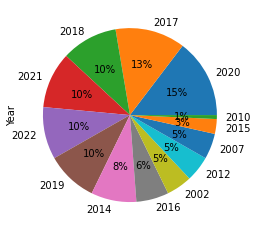

In [95]:
CarDetails_df["Year"].value_counts().plot.pie(autopct="%.f%%")

<AxesSubplot:xlabel='CarRating'>

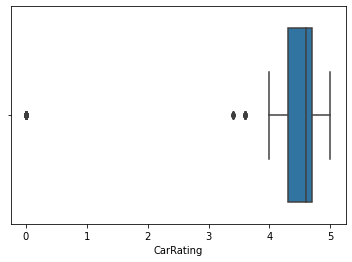

In [96]:
sns.boxplot(CarDetails_df["CarRating"])

<AxesSubplot:xlabel='CarPrice', ylabel='Density'>

Text(0.5, 1.0, 'Histogram of Car Prices')

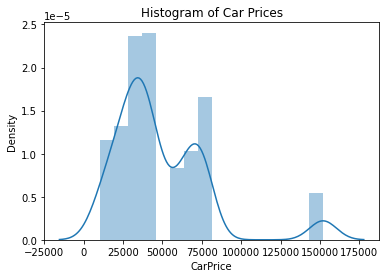

In [97]:
sns.distplot(CarDetails_df["CarPrice"])
plt.title('Histogram of Car Prices')
plt.show()

ValueError: could not convert string to float: '34,591 mi.'

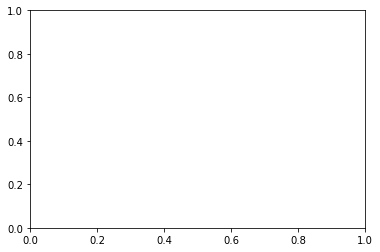

In [98]:
sns.distplot(CarDetails_df["CarMileage"])
plt.title('Histogram of Car Mileage')
plt.show()

In [99]:
# Biavriate

In [100]:
#Finding the corralation betwwen two Price and Year

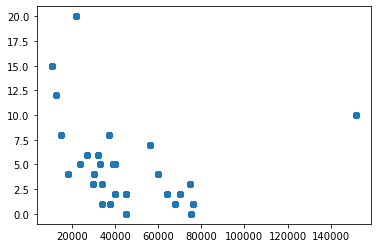

In [101]:
plt.scatter(CarDetails_df["CarPrice"],CarDetails_df["CarAge"])

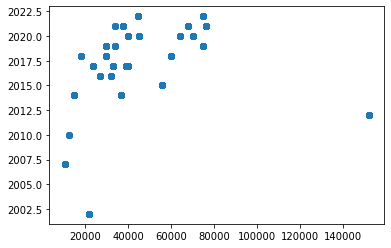

In [102]:
plt.scatter(CarDetails_df["CarPrice"],CarDetails_df["Year"])

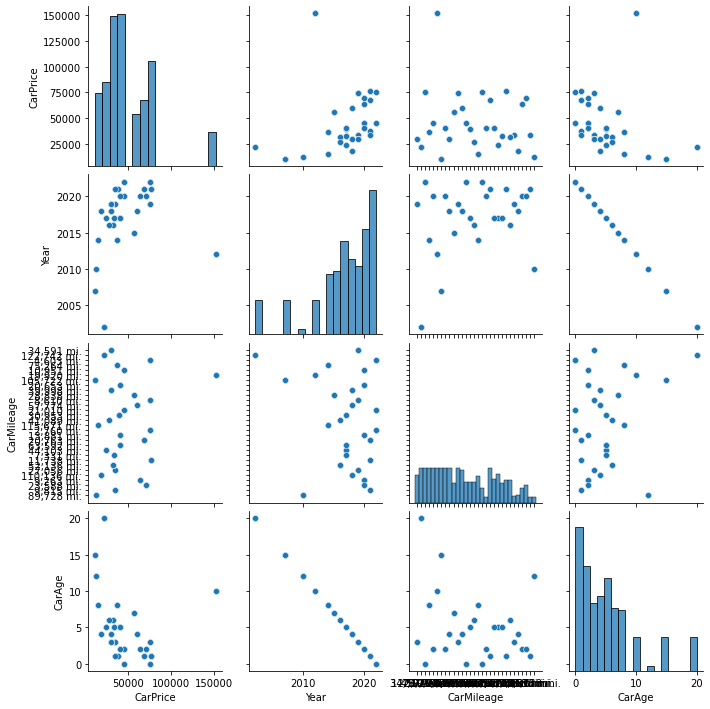

In [103]:
sns.pairplot(data = CarDetails_df, vars=['CarPrice','Year','CarMileage', 'CarAge'])
plt.show()

In [104]:
CarDetails_df[['CarMileage','CarPrice','CarRating']].corr()

,CarPrice,CarRating
CarPrice,1.000000,-0.028756
CarRating,-0.028756,1.000000


<AxesSubplot:xlabel='CarPrice', ylabel='CarName'>

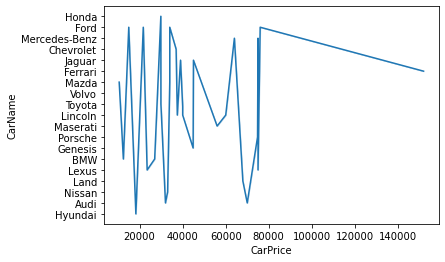

In [105]:
sns.lineplot(x = "CarPrice", y = "CarName", data = CarDetails_df)

<AxesSubplot:xlabel='CarRating', ylabel='CarDealer'>

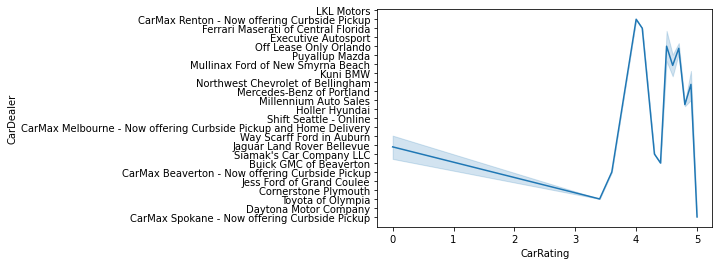

In [106]:
sns.lineplot(x = "CarRating", y = "CarDealer", data = CarDetails_df)

In [107]:
crosstab = pd.crosstab(CarDetails_df['CarName'], CarDetails_df['CarBadge'])
crosstab

CarBadge,Fair,Good,Great
CarName,,,
Audi,13,17,0
BMW,4,16,0
Chevrolet,0,26,0
Ferrari,0,26,0
Ford,0,48,20
Genesis,16,0,0
Honda,0,21,0
Hyundai,0,6,0
Jaguar,0,26,16


In [108]:
crosstab = pd.crosstab(CarDetails_df['CarName'], CarDetails_df['CarDealer'])
crosstab

CarDealer,Autowise,Buick GMC of Beaverton,CarMax Beaverton - Now offering Curbside Pickup,CarMax Melbourne - Now offering Curbside Pickup and Home Delivery,CarMax Renton - Now offering Curbside Pickup,CarMax Spokane - Now offering Curbside Pickup,Cornerstone Plymouth,Daytona Motor Company,Executive Autosport,Ferrari Maserati of Central Florida,...,Millennium Auto Sales,Mullinax Ford of New Smyrna Beach,Northwest Chevrolet of Bellingham,Off Lease Only Orlando,Puyallup Mazda,Rapids Honda,Shift Seattle - Online,Siamak's Car Company LLC,Toyota of Olympia,Way Scarff Ford in Auburn
CarName,,,,,,,,,,,,,,,,,,,,,
Audi,0,0,0,0,0,0,0,13,0,0,...,0,0,0,17,0,0,0,0,0,0
BMW,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Chevrolet,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Ferrari,0,0,0,0,0,0,0,0,0,26,...,0,0,0,0,0,0,0,0,0,0
Ford,26,0,0,0,0,0,5,0,0,0,...,0,0,0,0,0,0,20,0,0,0
Genesis,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Honda,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,21,0,0,0,0
Hyundai,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,6,0
Jaguar,0,0,0,0,26,0,0,0,0,0,...,16,0,0,0,0,0,0,0,0,0


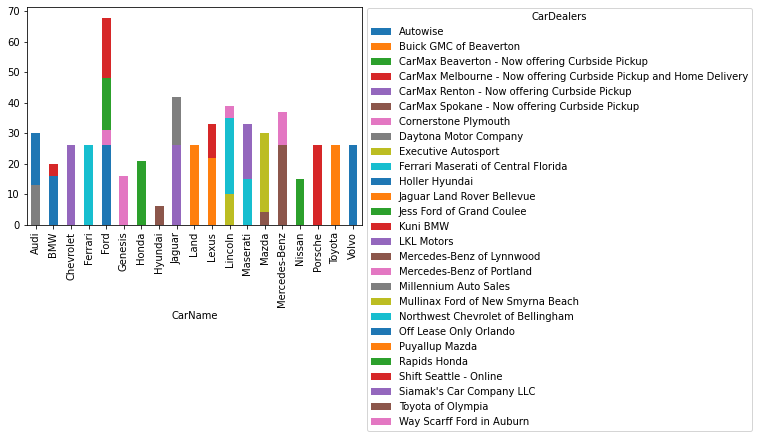

In [109]:
a = crosstab.plot(kind="bar", stacked=True)
a.legend(title='CarDealers', bbox_to_anchor=(1, 1.02),
         loc='upper left')

<AxesSubplot:xlabel='CarName'>

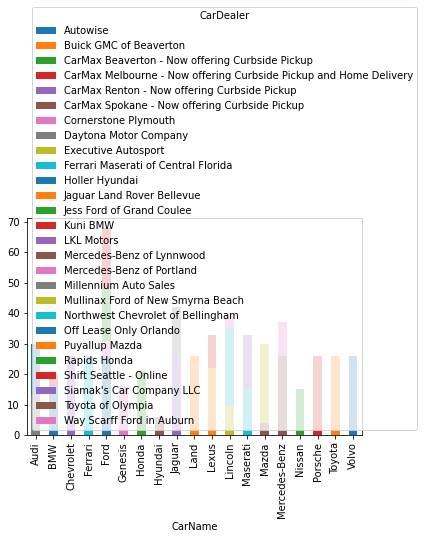

In [110]:
crosstab.plot(kind="bar", 
                 stacked=True)

In [114]:
sns.barplot(x='CarName', y='CarMileage', data=CarDetails_df)
plt.xticks(rotation = 90)
plt.show()

TypeError: Neither the `x` nor `y` variable appears to be numeric.

<AxesSubplot:xlabel='CarDealer', ylabel='CarRating'>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(0, 0, 'Rapids Honda'),
  Text(1, 0, 'Autowise'),
  Text(2, 0, 'Mercedes-Benz of Lynnwood'),
  Text(3, 0, 'LKL Motors'),
  Text(4, 0, 'CarMax Renton - Now offering Curbside Pickup'),
  Text(5, 0, 'Ferrari Maserati of Central Florida'),
  Text(6, 0, 'Executive Autosport'),
  Text(7, 0, 'Off Lease Only Orlando'),
  Text(8, 0, 'Puyallup Mazda'),
  Text(9, 0, 'Mullinax Ford of New Smyrna Beach'),
  Text(10, 0, 'Kuni BMW'),
  Text(11, 0, 'Northwest Chevrolet of Bellingham'),
  Text(12, 0, 'Mercedes-Benz of Portland'),
  Text(13, 0, 'Millennium Auto Sales'),
  Text(14, 0, 'Holler Hyundai'),
  Text(15, 0, 'Shift Seattle - Online'),
  Text(16, 0, 'CarMax Melbourne - Now offering Curbside Pickup and Home Delivery'),
  Text(17, 0, 'Way Scarff Ford in Auburn'),
  Text(18, 0, 'Jaguar Land Rover Bellevue'),
  Text(19, 0, "Siamak's Car Company LLC"),
  Text(20, 0, 'Buic

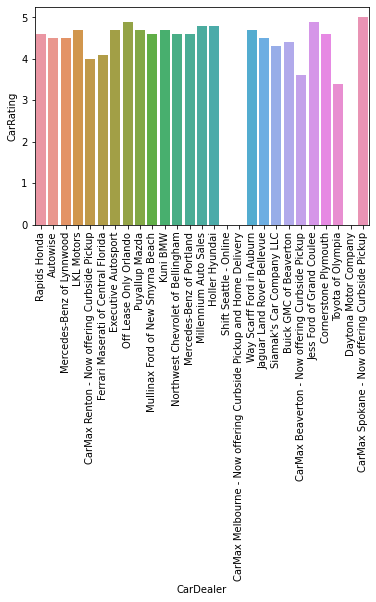

In [112]:
sns.barplot(x='CarDealer', y='CarRating', data=CarDetails_df)
plt.xticks(rotation = 90)
plt.show()

<AxesSubplot:xlabel='Year', ylabel='CarDealer'>

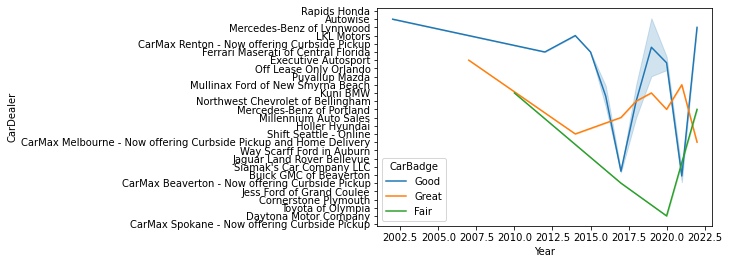

In [113]:
sns.lineplot(x = "Year", y = "CarDealer", hue='CarBadge', data = CarDetails_df)
plt.show()

In [ ]:
sns.lineplot(x = "Year", y = "CarName", hue='CarBadge', data = CarDetails_df)
plt.show()

In [ ]:
sns.lineplot(x = "CarAge", y = "CarName", hue='CarRating', data = CarDetails_df)
plt.show()